1. 生成数据...
2. 划分训练集和测试集...
3. 数据标准化...
4. 训练神经网络...
Epoch 100/1000, Loss: 0.114708
Epoch 200/1000, Loss: 0.096604
Epoch 300/1000, Loss: 0.086275
Epoch 400/1000, Loss: 0.081867
Epoch 500/1000, Loss: 0.078896
Epoch 600/1000, Loss: 0.076049
Epoch 700/1000, Loss: 0.073934
Epoch 800/1000, Loss: 0.070846
Epoch 900/1000, Loss: 0.066850
Epoch 1000/1000, Loss: 0.062615
5. 评估模型性能...
测试集均方误差 (MSE): 0.645170
6. 可视化结果...


C:\Users\fanyh\AppData\Local\Temp\ipykernel_39096\15644444.py:295: UserWarning: Glyph 35757 (\N{CJK UNIFIED IDEOGRAPH-8BAD}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\fanyh\AppData\Local\Temp\ipykernel_39096\15644444.py:295: UserWarning: Glyph 32451 (\N{CJK UNIFIED IDEOGRAPH-7EC3}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\fanyh\AppData\Local\Temp\ipykernel_39096\15644444.py:295: UserWarning: Glyph 36718 (\N{CJK UNIFIED IDEOGRAPH-8F6E}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\fanyh\AppData\Local\Temp\ipykernel_39096\15644444.py:295: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\fanyh\AppData\Local\Temp\ipykernel_39096\15644444.py:295: UserWarning: Glyph 25439 (\N{CJK UNIFIED IDEOGRAPH-635F}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\fanyh\AppData\Local\Temp\ipykernel_39096\15644444.py:295: UserWarning: Glyph 22833 (\N{CJK 

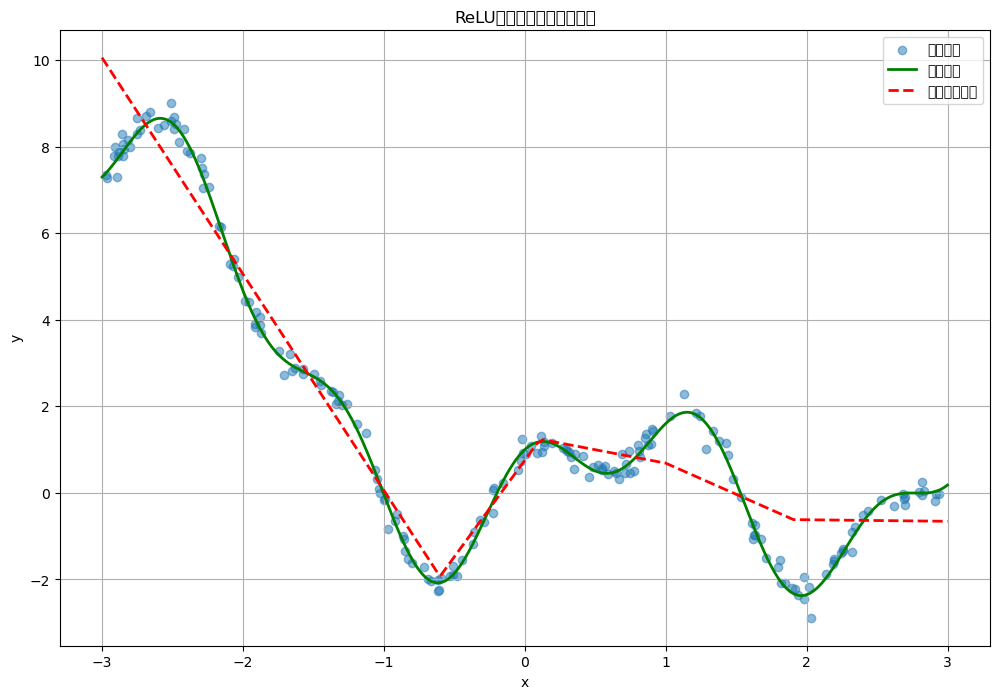

C:\Anaconda3\envs\myenv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 25439 (\N{CJK UNIFIED IDEOGRAPH-635F}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Anaconda3\envs\myenv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 22833 (\N{CJK UNIFIED IDEOGRAPH-5931}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Anaconda3\envs\myenv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 35757 (\N{CJK UNIFIED IDEOGRAPH-8BAD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Anaconda3\envs\myenv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 32451 (\N{CJK UNIFIED IDEOGRAPH-7EC3}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Anaconda3\envs\myenv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 26354 (\N{CJK UNIFIED IDEOGRAPH-66F2}) missing from font(s) DejaVu Sans.
  

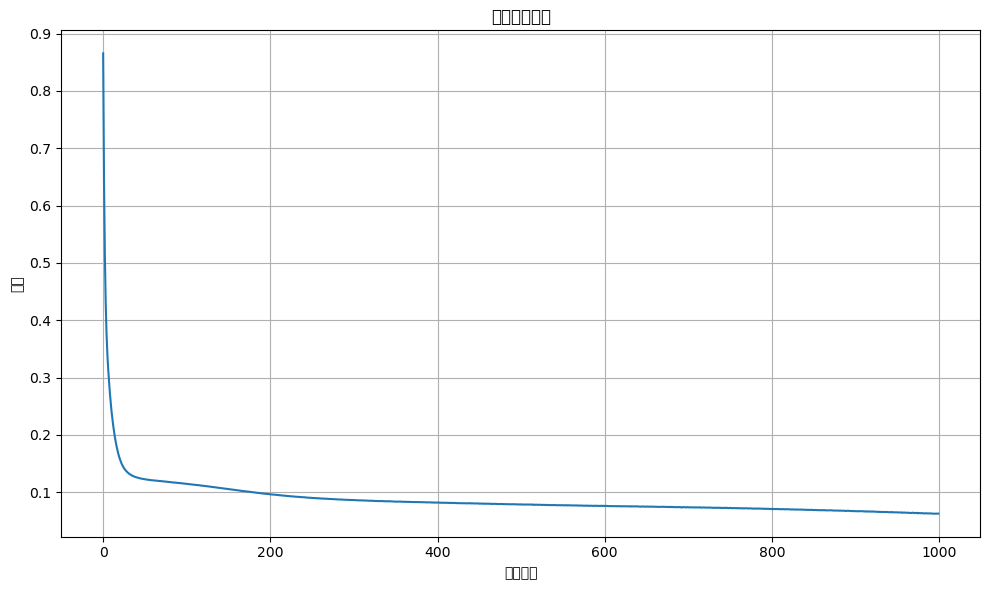

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 设置随机种子以保证结果可复现
np.random.seed(42)

# 自定义函数
def target_function(x):
    """
    定义一个复杂的非线性函数作为我们要拟合的目标函数
    
    参数:
    x: 输入数据，可以是标量或numpy数组
    
    返回:
    函数计算结果
    """
    return 2 * np.sin(2 * x) + 0.5 * x**2 - x + np.cos(5 * x)

# 生成数据
def generate_data(n_samples=1000, noise_level=0.2):
    """
    生成带有噪声的数据点
    
    参数:
    n_samples: 样本数量
    noise_level: 噪声水平
    
    返回:
    X: 输入数据
    y: 目标数据（带噪声）
    """
    # 在[-3, 3]范围内均匀采样点
    X = np.random.uniform(-3, 3, (n_samples, 1))
    
    # 计算真实函数值
    y_true = target_function(X)
    
    # 添加随机高斯噪声
    noise = np.random.normal(0, noise_level, (n_samples, 1))
    y = y_true + noise
    
    return X, y

# ReLU激活函数
def relu(x):
    """
    ReLU激活函数
    
    参数:
    x: 输入数据
    
    返回:
    max(0, x)
    """
    return np.maximum(0, x)

# ReLU激活函数的导数
def relu_derivative(x):
    """
    ReLU激活函数的导数
    
    参数:
    x: 输入数据
    
    返回:
    1 if x > 0 else 0
    """
    return np.where(x > 0, 1, 0)

class TwoLayerReLUNetwork:
    """
    使用NumPy实现的两层ReLU神经网络
    """
    
    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.001):
        """
        初始化神经网络
        
        参数:
        input_size: 输入层神经元数量
        hidden_size: 隐藏层神经元数量
        output_size: 输出层神经元数量
        learning_rate: 学习率
        """
        # 初始化权重和偏置
        self.W1 = np.random.randn(input_size, hidden_size) * 0.1
        self.b1 = np.zeros((1, hidden_size))
        self.W2 = np.random.randn(hidden_size, output_size) * 0.1
        self.b2 = np.zeros((1, output_size))
        
        self.learning_rate = learning_rate
        
    def forward(self, X):
        """
        前向传播
        
        参数:
        X: 输入数据
        
        返回:
        y_pred: 预测输出
        """
        # 第一层
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = relu(self.z1)
        
        # 第二层（输出层）
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        y_pred = self.z2  # 回归问题，不使用激活函数
        
        return y_pred
    
    def backward(self, X, y, y_pred):
        """
        反向传播
        
        参数:
        X: 输入数据
        y: 真实标签
        y_pred: 预测输出
        
        返回:
        loss: 当前批次的损失
        """
        batch_size = X.shape[0]
        
        # 计算损失（均方误差）
        loss = np.mean(np.square(y_pred - y))
        
        # 输出层梯度
        dz2 = 2 * (y_pred - y) / batch_size
        dW2 = np.dot(self.a1.T, dz2)
        db2 = np.sum(dz2, axis=0, keepdims=True)
        
        # 隐藏层梯度
        da1 = np.dot(dz2, self.W2.T)
        dz1 = da1 * relu_derivative(self.z1)
        dW1 = np.dot(X.T, dz1)
        db1 = np.sum(dz1, axis=0, keepdims=True)
        
        # 更新权重和偏置
        self.W2 -= self.learning_rate * dW2
        self.b2 -= self.learning_rate * db2
        self.W1 -= self.learning_rate * dW1
        self.b1 -= self.learning_rate * db1
        
        return loss
    
    def train(self, X, y, epochs=1000, batch_size=32, verbose=True):
        """
        训练神经网络
        
        参数:
        X: 训练数据
        y: 训练标签
        epochs: 训练轮数
        batch_size: 批次大小
        verbose: 是否打印训练过程
        
        返回:
        losses: 训练过程中的损失
        """
        n_samples = X.shape[0]
        losses = []
        
        for epoch in range(epochs):
            # 随机打乱数据
            indices = np.random.permutation(n_samples)
            X_shuffled = X[indices]
            y_shuffled = y[indices]
            
            epoch_loss = 0
            
            # 批次训练
            for i in range(0, n_samples, batch_size):
                X_batch = X_shuffled[i:i+batch_size]
                y_batch = y_shuffled[i:i+batch_size]
                
                # 前向传播
                y_pred = self.forward(X_batch)
                
                # 反向传播
                batch_loss = self.backward(X_batch, y_batch, y_pred)
                epoch_loss += batch_loss * X_batch.shape[0]
            
            # 计算整个训练集上的平均损失
            epoch_loss /= n_samples
            losses.append(epoch_loss)
            
            # 打印训练过程
            if verbose and (epoch + 1) % 100 == 0:
                print(f'Epoch {epoch+1}/{epochs}, Loss: {epoch_loss:.6f}')
        
        return losses

    def predict(self, X):
        """
        使用训练好的网络进行预测
        
        参数:
        X: 输入数据
        
        返回:
        预测结果
        """
        return self.forward(X)

# 主函数
def main():
    """
    主函数：生成数据，训练模型，评估结果
    """
    # 1. 生成数据
    print("1. 生成数据...")
    X, y = generate_data(n_samples=1000, noise_level=0.2)
    
    # 2. 划分训练集和测试集
    print("2. 划分训练集和测试集...")
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # 3. 数据标准化
    print("3. 数据标准化...")
    scaler_X = StandardScaler()
    scaler_y = StandardScaler()
    
    X_train_scaled = scaler_X.fit_transform(X_train)
    X_test_scaled = scaler_X.transform(X_test)
    
    y_train_scaled = scaler_y.fit_transform(y_train)
    y_test_scaled = scaler_y.transform(y_test)
    
    # 4. 初始化并训练神经网络
    print("4. 训练神经网络...")
    input_size = 1
    hidden_size = 100  # 隐藏层神经元数量
    output_size = 1
    
    model = TwoLayerReLUNetwork(input_size, hidden_size, output_size, learning_rate=0.01)
    losses = model.train(X_train_scaled, y_train_scaled, epochs=1000, batch_size=32, verbose=True)
    
    # 5. 在测试集上评估模型
    print("5. 评估模型性能...")
    y_pred_scaled = model.predict(X_test_scaled)
    y_pred = scaler_y.inverse_transform(y_pred_scaled)
    
    # 计算测试集上的均方误差
    mse = np.mean(np.square(y_pred - y_test))
    print(f"测试集均方误差 (MSE): {mse:.6f}")
    
    # 6. 可视化结果
    print("6. 可视化结果...")
    
    # 排序数据点以便绘图
    sorted_indices = np.argsort(X_test.flatten())
    X_test_sorted = X_test[sorted_indices]
    y_test_sorted = y_test[sorted_indices]
    y_pred_sorted = y_pred[sorted_indices]
    
    # 生成平滑曲线的数据点
    X_smooth = np.linspace(-3, 3, 1000).reshape(-1, 1)
    y_smooth = target_function(X_smooth)
    
    X_smooth_scaled = scaler_X.transform(X_smooth)
    y_pred_smooth_scaled = model.predict(X_smooth_scaled)
    y_pred_smooth = scaler_y.inverse_transform(y_pred_smooth_scaled)
    
    plt.figure(figsize=(12, 8))
    
    # 绘制测试数据点
    plt.scatter(X_test, y_test, alpha=0.5, label='测试数据')
    
    # 绘制真实函数曲线
    plt.plot(X_smooth, y_smooth, 'g-', linewidth=2, label='真实函数')
    
    # 绘制神经网络预测曲线
    plt.plot(X_smooth, y_pred_smooth, 'r--', linewidth=2, label='神经网络预测')
    
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('ReLU神经网络函数拟合效果')
    plt.legend()
    plt.grid(True)
    
    # 绘制损失曲线
    plt.figure(figsize=(10, 6))
    plt.plot(losses)
    plt.xlabel('训练轮数')
    plt.ylabel('损失')
    plt.title('训练损失曲线')
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()